# Business Understanding

## Project Overview
This project outlines analysis based on movie datasets for business-stakeholders new to the movie industry.

## Business problem: 
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.
## Project objectives: 
### Main Objective
To analyze movie data and uncover patterns in sales, popularity, ratings, and director influence across genres, providing actionable insights for business growth and strategy.

### Specific Objectives
1. Identify which genres generate the most revenue and analyze trends contributing to their sales performance.
   
2. Understand which genres are most popular among audiences and explore factors driving their popularity.
  `
3. Examine the ratings of top genres to evaluate their critical reception.
   
4. Identify top selling movies with their related genre.

5. Determine most popular directors

6. Identify the top selling directors

7. Idenfity top popular movie ratings
    

### The Data
We used the folder `zippedData` that are movie datasets from the following websites:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Here are the datasets our crucial for analysis:
`bom.movie_gross.csv` , `rt.movie_info.tsv`,`tmdb.movies.csv`
a sql database:`im.db`where tables considered were;`movie_basics`, `movie_rating` 



# Data Understanding 

Here will need to understand our data. This involves getting the relevant information from each dataset crucial for our analysis. 

We start by loading the various datasets reviewing their various information based on the columns and check which information is necessary for our analysis before beginning the data cleaning.

In [1]:
#importing libraries for data manipulation (pandas, numpy) and visualization (seaborn, matplotlib)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sqlite3
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# set the maximum number of columns to 40 to display all columns
pd.set_option('display.max_columns', 40)

Loading information from <b>rt.movie_info.tsv</b> dataset

In [3]:
#loading the dataset and checking the top five columns
movie_df = pd.read_csv('rt.movie_info.tsv', sep='\t')
movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
#checking the shape getting information of the rows and columns
movie_df.shape

(1560, 12)

In [5]:
#checking information  for each column of the dataset
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


 Loading the <b> bom.movie_gross.csv</b>

In [6]:
#Loading the dataset 
gross_df = pd.read_csv("bom.movie_gross.csv")

In [7]:
#checking the top 5 columns
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
#Viewing information for each column
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#checking the statistical information for numerical columns
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Loading the <b>tmdb.movies.csv</b> dataset

In [10]:
#Loading the dataset and viewing the first five columns
tmdb_df = pd.read_csv("tmdb.movies.csv")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
#Checking for information of each column from the dataset
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [12]:
#Viewing the statistical information
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


Connecting to the SQL database

In [13]:
#connecting to the sql database
conn = sqlite3.Connection('im.db')


In [14]:
#getting table names
cursor = conn.cursor()
cursor.execute("""SELECT name
    FROM sqlite_master
    WHERE type = 'table';""")
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [15]:
#Loading the movie basics table
mbasics_df = pd.read_sql("""SELECT * FROM movie_basics;""",conn)

In [16]:
#Checking the top five columns
mbasics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
#Checking for the information of each column
mbasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
#Loading the the movie_ratings table from the database
rating_df = pd.read_sql("""SELECT * FROM movie_ratings;""",conn)

In [19]:
#Checking the top 5 columns
rating_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
#Chcecking for the information from each column
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
#checking for the statistical information
rating_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [22]:
directors_df = pd.read_sql("""SELECT * FROM directors;""",conn)

In [23]:
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [24]:
directors_df.tail()

,movie_id,person_id
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
291173,tt9004986,nm4993825


In [25]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


## Data Cleaning

After looking into our dataset and reviewing what categorical and numerical data we will require we begin our data cleaning process by:
1. Dropping columns unecessary for our analysis
2. Checking for missing values
3. Rectifying column arrangement and uniformity
4. Checking for outliers
5. Dropping duplicates
6. Changing the data types

## Cleaning for the movie_df dataset

### Dropping unecessary columns 

In [26]:
# drop those columns with more than 1000 non-null rows
movie_df = movie_df.drop(['currency', 'studio','writer','synopsis','runtime','dvd_date'],axis=1)

### Checking for missing values 

In [27]:
#Checking for missing values in each column
movie_df.isna().sum()

id                 0
rating             3
genre              8
director         199
theater_date     359
box_office      1220
dtype: int64

In [28]:
#replacing movie genre nulls with mode and confirming the changes
genre_mode = movie_df.genre.mode()[0]
movie_df.genre.fillna(genre_mode, inplace=True)
movie_df.genre.isna().sum()

0

In [29]:
#replacing movie rating nulls with mode
rating_mode = movie_df.rating.mode()[0]
movie_df.rating.fillna(rating_mode, inplace=True)
movie_df.rating.isna().sum()

0

In [30]:
#drop the rest with nulls
movie_df.dropna(inplace=True)


In [31]:
#Confirming that there are no null values 
movie_df.isnull().sum().any()

False

In [32]:
#Renaming columns
movie_df.rename(columns={'theater_date':'year'},inplace=True)

In [33]:
#changing the box office values to numerical(box office sales a movie makes after its release)
#noted it was not numerical since it gave out an error when trying to fill missing values
# Step 1: Remove commas
movie_df['box_office'] = movie_df['box_office'].str.replace(',', '')

# Step 2: Convert to integers
movie_df['box_office'] = movie_df['box_office'].astype(int)

In [34]:
#Confirming changes to the dataset
movie_df.head()

,id,rating,genre,director,year,box_office
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012",600000
6,10,PG-13,Comedy,Jake Kasdan,"Jan 11, 2002",41032915
7,13,R,Drama,Ray Lawrence,"Apr 27, 2006",224114
8,14,R,Drama,Taylor Hackford,"Jun 30, 2010",134904
15,22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,"Dec 17, 2010",1039869


## Cleaning for the gross_df dataset

In [35]:
#Dropping unnecessary columns
gross_df.drop(["studio"],axis=1,inplace=True)

### Checking for missing values

In [36]:
#checking for any missng values
gross_df.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

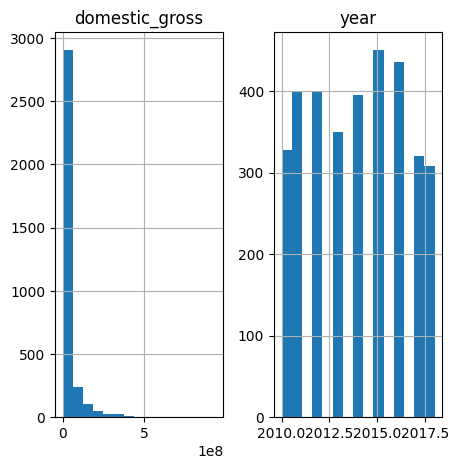

In [37]:
#checking for the distribution for the numerical values
gross_df.hist(bins=15,figsize=(5,5));

From the histograms we noticed the foreign_gross column is not numerical so we change its data type to float as shown below:

In [38]:
# converting 'foreign_gross' to float 
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'],errors='coerce')

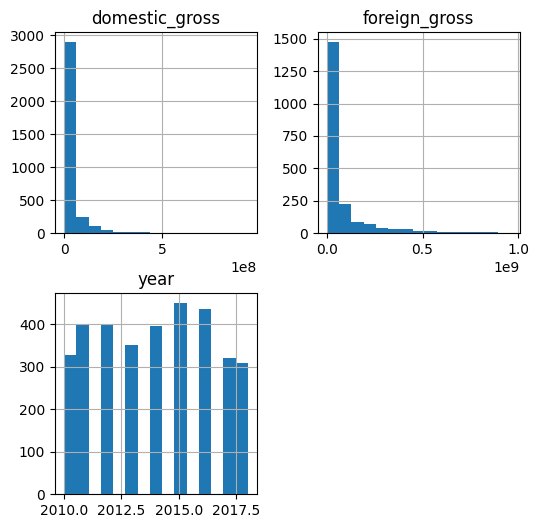

In [39]:
#confirming the changes 
gross_df.hist(bins=15,figsize=(6,6));

We notice that the distribution has skewness hence we use median to fill in the missing values

In [40]:
#replacing gross for domestic and foreign with median
gross_df["domestic_gross"]=gross_df["domestic_gross"].fillna(gross_df["domestic_gross"].median())

gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(gross_df['foreign_gross'].median())

In [41]:
# calculating 'total_gross' as the sum of 'domestic_gross' and 'foreign_gross'
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

gross_df[['domestic_gross', 'foreign_gross', 'total_gross']].head()

,domestic_gross,foreign_gross,total_gross
0,415000000.0,652000000.0,1.067000e+09
1,334200000.0,691300000.0,1.025500e+09
2,296000000.0,664300000.0,9.603000e+08
3,292600000.0,535700000.0,8.283000e+08
4,238700000.0,513900000.0,7.526000e+08


In [42]:
#drop the rest with nulls
gross_df.dropna(inplace=True)
#confirming there are no null values 
gross_df.isnull().sum().any()

False

In [43]:
#Changing the numerical columns to currency for uniformity

gross_df['domestic_gross'] = gross_df['domestic_gross'].apply(lambda x: f"${x:,.2f}")

gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(lambda x: f"${x:,.2f}")

gross_df['total_gross'] = gross_df['total_gross'].apply(lambda x: f"${x:,.2f}")

In [44]:
#adding the id as the  first column
gross_df.insert(0, 'id', range(1, len(gross_df) + 1))


In [45]:
gross_df.head()

,id,title,domestic_gross,foreign_gross,year,total_gross
0,1,Toy Story 3,"$415,000,000.00","$652,000,000.00",2010,"$1,067,000,000.00"
1,2,Alice in Wonderland (2010),"$334,200,000.00","$691,300,000.00",2010,"$1,025,500,000.00"
2,3,Harry Potter and the Deathly Hallows Part 1,"$296,000,000.00","$664,300,000.00",2010,"$960,300,000.00"
3,4,Inception,"$292,600,000.00","$535,700,000.00",2010,"$828,300,000.00"
4,5,Shrek Forever After,"$238,700,000.00","$513,900,000.00",2010,"$752,600,000.00"


## Cleaning for the tmdb_df dataset

### Dropping columns

In [46]:
#Dropping the unecessary columns
tmdb_df.drop(["vote_average","vote_count","genre_ids","id",'original_language',"original_title"], axis=1,inplace=True)

### Checking for missing values

In [47]:
#Checking for the missing values
tmdb_df.isna().sum()

Unnamed: 0      0
popularity      0
release_date    0
title           0
dtype: int64

In [48]:
tmdb_df.head()

,Unnamed: 0,popularity,release_date,title
0,0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,28.734,2010-03-26,How to Train Your Dragon
2,2,28.515,2010-05-07,Iron Man 2
3,3,28.005,1995-11-22,Toy Story
4,4,27.920,2010-07-16,Inception


### Changing Columns

In [49]:
# Renaming columns in tmdb_df
tmdb_df.rename(columns={'Unnamed: 0': 'id'},inplace=True)

tmdb_df.rename(columns={'release_date':'year'},inplace=True)



In [50]:
tmdb_df.head()

,id,popularity,year,title
0,0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,28.734,2010-03-26,How to Train Your Dragon
2,2,28.515,2010-05-07,Iron Man 2
3,3,28.005,1995-11-22,Toy Story
4,4,27.920,2010-07-16,Inception


## Cleaning for mbasic_df dataset

### Dropping columns

In [51]:
#Dropping  columns unnecessary for our analysis
mbasics_df.drop(["original_title","runtime_minutes"],axis=1,inplace=True)

### Checking for missing values

In [52]:
#Checking missing values
mbasics_df.isnull().sum().any

<bound method Series.any of movie_id            0
primary_title       0
start_year          0
genres           5408
dtype: int64>

In [53]:
#Filling the missiing values for the genres columns which is an object
for column in mbasics_df.select_dtypes(include=["object"]).columns:
    mbasics_df[column].fillna(mbasics_df[column].mode()[0],inplace=True)

In [54]:
#Confirming for no missing values
mbasics_df.isnull().sum().any()

False

### Renaming columns

In [55]:
#Renaming the columns
mbasics_df.rename(columns={"movie_id":'id'},inplace=True)

mbasics_df.rename(columns={"start_year":'year'},inplace=True)

mbasics_df.rename(columns={"primary_title":'title'},inplace=True)


In [56]:
mbasics_df.head()

,id,title,year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


## Cleaning for the rating_df dataset

### Dropping unnecessary columns

In [57]:
#Dropping unecessary columns
rating_df.drop(["numvotes"],axis=1,inplace=True)

### Checking for missing values

In [58]:
#Checking for missing values
rating_df.isnull().sum().any()

False

In [59]:
#Renaming columns
rating_df.rename(columns={"movie_id":"id"},inplace=True)

rating_df.rename(columns={"averagerating":"average_rating"},inplace=True)

In [60]:
rating_df.head()

,id,average_rating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


### Checking Duplicates

In [61]:
#Checking for dupicates for movie_df
movie_df.duplicated().sum()

0

In [62]:
#Checking for dupicates for gross_df
gross_df.duplicated().sum()

0

In [63]:
#Checking for dupicates for tmdb_df
tmdb_df.duplicated().sum()

0

In [64]:
#Checking for dupicates for mbasics_df
mbasics_df.duplicated().sum()

0

In [65]:
#Checking for dupicates for the rating_df dataset
rating_df.duplicated().sum()

0

In [66]:
directors_df.duplicated().sum()

127639

In [67]:
directors_df.drop_duplicates(inplace=True)
directors_df.duplicated().sum()

0

### Feature engineering

In [68]:
# Split 'genre' into 'main_genre' and 'supporting_genre'
movie_df['main_genre'] = movie_df['genre'].str.split('|').str[0]
movie_df['supporting_genre'] = movie_df['genre'].str.split('|').apply(lambda x: '|'.join(x[1:]) if len(x) > 1 else '')

# Preview the result
movie_df[['genre', 'main_genre', 'supporting_genre']].head()


,genre,main_genre,supporting_genre
1,Drama|Science Fiction and Fantasy,Drama,Science Fiction and Fantasy
6,Comedy,Comedy,
7,Drama,Drama,
8,Drama,Drama,
15,Comedy|Drama|Mystery and Suspense,Comedy,Drama|Mystery and Suspense


In [69]:
# Convert 'theater_date' and 'dvd_date' columns to datetime format
movie_df["year"]= pd.to_datetime(movie_df["year"]).dt.year

movie_df[['year']].head()

,year
1,2012
6,2002
7,2006
8,2010
15,2010


In [70]:
#From the new columns we can drop the columns further for easier analysis
movie_df.drop(["genre","supporting_genre"],axis=1,inplace=True)

#Renaming the remaining column
movie_df.rename({"main_genre":"genre"},axis=1,inplace=True)


In [71]:
#Confirming changes
movie_df.head()

,id,rating,director,year,box_office,genre
1,3,R,David Cronenberg,2012,600000,Drama
6,10,PG-13,Jake Kasdan,2002,41032915,Comedy
7,13,R,Ray Lawrence,2006,224114,Drama
8,14,R,Taylor Hackford,2010,134904,Drama
15,22,R,George Hickenlooper,2010,1039869,Comedy


In [72]:
# convert 'release_date' to year 
tmdb_df["year"]= pd.to_datetime(tmdb_df["year"]).dt.year


In [73]:
# merging the movie_df and gross_df on 'id'
movie_basics_rating_df = pd.merge(mbasics_df, rating_df, on='id', how='inner')




In [74]:
movie_basics_rating_df.head()

,id,title,year,genres,average_rating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [75]:
#Merging the tm1 dataset("tmdb.movies.csv") to the original merged data set
# First merge: Add tmdb1 to the existing merged DataFrame
movie_basics_rating_df_final = pd.merge(movie_basics_rating_df, tmdb_df, on="title", how='inner')

# Second merge: Add bom1 to the updated merged DataFrame using the same column name
movie_basics_rating_df_final = pd.merge(movie_basics_rating_df, gross_df, on="title", how='inner')
# Check the result
print(movie_basics_rating_df_final.head())


        id_x                            title  year_x  \
0  tt0315642                            Wazir    2016   
1  tt0337692                      On the Road    2012   
2  tt4339118                      On the Road    2014   
3  tt5647250                      On the Road    2016   
4  tt0359950  The Secret Life of Walter Mitty    2013   

                    genres  average_rating  id_y  domestic_gross  \
0       Action,Crime,Drama             7.1  2569   $1,100,000.00   
1  Adventure,Drama,Romance             6.1   905     $744,000.00   
2                    Drama             6.0   905     $744,000.00   
3                    Drama             5.7   905     $744,000.00   
4   Adventure,Comedy,Drama             7.3  1170  $58,200,000.00   

     foreign_gross  year_y      total_gross  
0   $18,900,000.00    2016   $20,000,000.00  
1    $8,000,000.00    2012    $8,744,000.00  
2    $8,000,000.00    2012    $8,744,000.00  
3    $8,000,000.00    2012    $8,744,000.00  
4  $129,900,000.00

In [76]:
#Changing the merged dataset to a dataframe
merged_movies_final_df=pd.DataFrame(movie_basics_rating_df_final)
merged_movies_final_df

,id_x,title,year_x,genres,average_rating,id_y,domestic_gross,foreign_gross,year_y,total_gross
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,2569,"$1,100,000.00","$18,900,000.00",2016,"$20,000,000.00"
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,tt4339118,On the Road,2014,Drama,6.0,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,tt5647250,On the Road,2016,Drama,5.7,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,1170,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"
...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,2018,Drama,7.1,2322,$300.00,"$18,900,000.00",2015,"$18,900,300.00"
3023,tt8404272,How Long Will I Love U,2018,Romance,6.5,3150,"$747,000.00","$82,100,000.00",2018,"$82,847,000.00"
3024,tt8427036,Helicopter Eela,2018,Drama,5.4,3355,"$72,000.00","$18,900,000.00",2018,"$18,972,000.00"
3025,tt9078374,Last Letter,2018,"Drama,Romance",6.4,3320,"$181,000.00","$18,900,000.00",2018,"$19,081,000.00"


In [77]:
#Dropping unnecessary columns for the merged dataset
merged_movies_final_df.drop(columns=["id_x","year_x","id_y"],axis=1,inplace=True)

In [78]:
#Renaming columns
merged_movies_final_df.rename({"year_y":"year"},axis=1,inplace=True)

In [79]:
#Confirming the changes
merged_movies_final_df

,title,genres,average_rating,domestic_gross,foreign_gross,year,total_gross
0,Wazir,"Action,Crime,Drama",7.1,"$1,100,000.00","$18,900,000.00",2016,"$20,000,000.00"
1,On the Road,"Adventure,Drama,Romance",6.1,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,On the Road,Drama,6.0,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,On the Road,Drama,5.7,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"
...,...,...,...,...,...,...,...
3022,The Chambermaid,Drama,7.1,$300.00,"$18,900,000.00",2015,"$18,900,300.00"
3023,How Long Will I Love U,Romance,6.5,"$747,000.00","$82,100,000.00",2018,"$82,847,000.00"
3024,Helicopter Eela,Drama,5.4,"$72,000.00","$18,900,000.00",2018,"$18,972,000.00"
3025,Last Letter,"Drama,Romance",6.4,"$181,000.00","$18,900,000.00",2018,"$19,081,000.00"


### Saving Dataset

In [80]:
#Saving the merged dataset
merged_movies_final_df.to_csv("merged_movies_clean.csv")

In [81]:
#Saving the movie_df dataset
movie_df.to_csv("movie_info_clean.csv")

# Data Preparation


## Analysis 

### Analysis based on Genre Vs  Rating

We will make a visualization for top 10 genres with the highest ratings

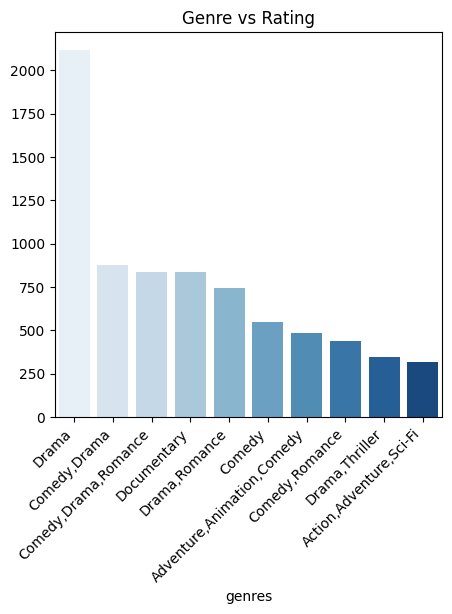

In [82]:
genre_rating= merged_movies_final_df.groupby("genres")["average_rating"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 5))
sns.barplot(x=genre_rating.index, y=genre_rating.values,palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Rating')
plt.show()

#### Findings:

From the above analysis it is evident that the drama genre is the genre with highest rating with a rating higher than 2000.

### Analysis based on Genre Vs Sales

Here we will make visualization based on the top 10 highest selling genres based on amount each genre grossed.

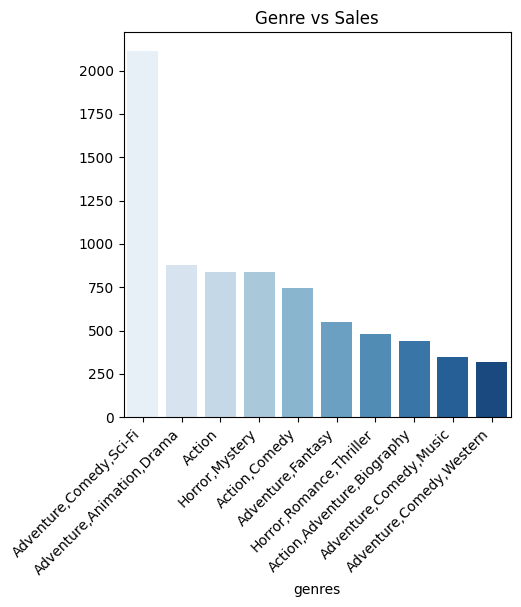

In [83]:
genre_sales= merged_movies_final_df.groupby("genres")["total_gross"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 5))
sns.barplot(x=genre_sales.index, y=genre_rating.values,palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Sales')
plt.show()

#### Findings:

Here we are able to view that the Adventure, Comedy and Sci-Fi genre has the highest sales. This may be brought by reasons such perfect direction, quality production and entertaining  movies from this certain genre.

### Analysis based on Genre popularity

Here we will make visualizations based on genres with most popularity

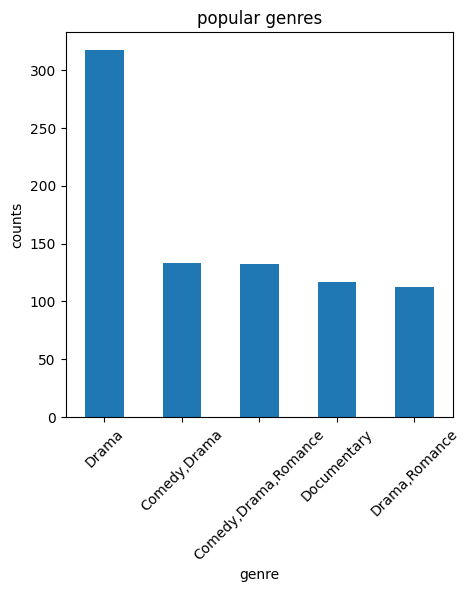

In [84]:
merged_movies_final_df["genres"].value_counts().head(5).plot(kind='bar',figsize=(5,5))
sns.set_palette('Blues')
plt.title("popular genres")
plt.ylabel("counts")
plt.xlabel('genre')
plt.xticks(rotation=45);

#### Findings:

From the above analysis it is evident that drama genre is also the most popular genre. This may be due audience preferabilty, quality production and perfect direction from the directors associated with this particular genre

### Analysis on top selling movies with their popular genres

We can further our analysis based on best selling movies by visualizing with their associate genres

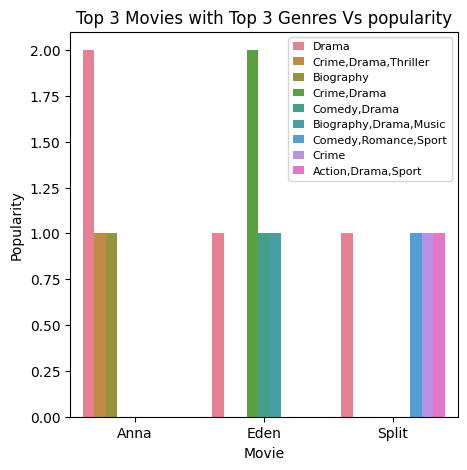

In [85]:
#top movies based on genre popularity
top_three_movies = merged_movies_final_df["title"].value_counts().head(3).index

filtered_data = merged_movies_final_df[merged_movies_final_df["title"].isin(top_three_movies)]

top_genres=(
    filtered_data.groupby("title")["genres"]
    .value_counts()
    .groupby(level=0).nlargest(3)
    .reset_index(level=0,drop=True)
    .index.get_level_values(1)
)
    
filtered_data=filtered_data[filtered_data['genres'].isin(top_genres)]

plt.figure(figsize=(5, 5))#select figure size
sns.countplot(data=filtered_data, x='title', hue='genres')#selecting type of graph(countplot)
plt.title('Top 3 Movies with Top 3 Genres Vs popularity')#title for the graph
plt.xlabel('Movie')#x-axis label
plt.ylabel('Popularity')#y-axis label
plt.legend(title='Genres')#legend title
plt.legend(fontsize='small')  # You can use 'small', 'medium', 'large' or specify a number like 8 or 10

# Alternatively, you can control the size of the legend box:
plt.legend(handlelength=1, fontsize=8)  #
plt.show()#visualize the graph


#### Findings:

It is evident that the top selling movies are associated with the best rating and most popular genres such as the drama genre.

### Analysis on best rated genre yearly

Since drama is the most popular genre we can create a visualization on how it has faired over the years

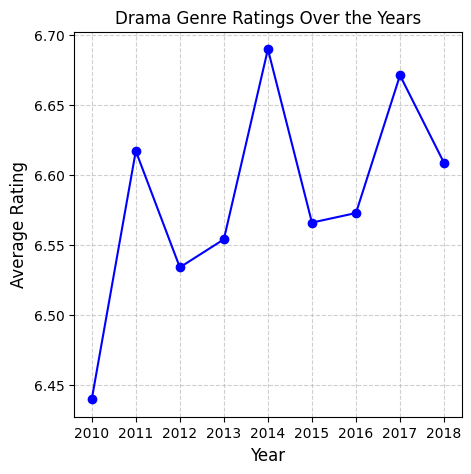

In [86]:
#how genre with best rating has faired over the years(univariate analysis)
# Filter for the genre of interest
genre_of_interest = "Drama"
drama_df = merged_movies_final_df[merged_movies_final_df['genres'].str.contains(genre_of_interest, na=False)]

# Perform univariate analysis: Focus on average ratings over time
drama_yearly = drama_df.groupby('year')['average_rating'].mean()

# Plotting the univariate trend
plt.figure(figsize=(5, 5))
drama_yearly.plot(kind='line', marker='o', color='blue')
plt.title("Drama Genre Ratings Over the Years")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

#### Findings:

The graph depicts the trend of average ratings for the drama genre from 2010 to 2018. Here's an analysis: 
 The ratings exhibit fluctuations over the years rather than a consistent trend. 
 The highest average rating occurs around 2014, reaching approximately 6.70. 
 The lowest rating is observed in 2010, near 6.45. 
 There is notable variability, with significant increases from 2010 to 2011 and a sharp rise to the peak in 2014. Post-2014, the ratings dip and rise again, peaking slightly in 2016 and 2017 before a small drop in 2018. 
 From 2015 to 2016, the ratings appear more stable compared to previous years. 
This analysis suggests a variability in drama ratings, with an overall upward movement from the start to the peak, followed by a decline and stabilization towards the end of the period. This may be brought about by poor direction or production for this particular genre.

### Analysis based on top popular directors

We can further our analysis based on the top 5 directors 

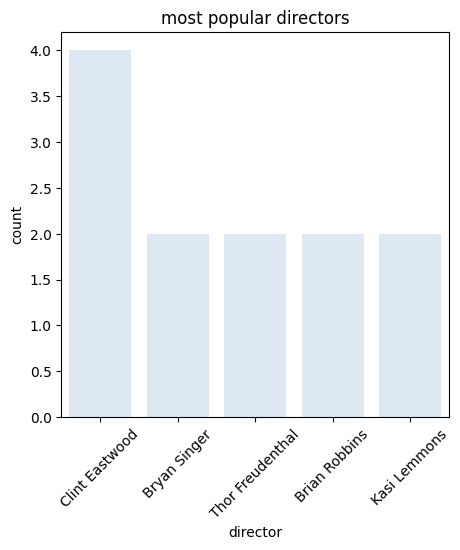

In [87]:
#popular directors
director_popularity = movie_df['director'].value_counts().head(5)
plt.figure(figsize=(5,5))
sns.barplot(x=director_popularity.index,y=director_popularity.values)
plt.title("most popular directors")
plt.xlabel("director")
plt.ylabel("count")
plt.xticks(rotation=45);

#### Findings:

From the above analysis it is evident that Clint Eastwood is the highest selling director. This may be brought by factors such as perfect direction, availability and good work ethics.

### Analysis based on best selling directors

We can then make a visualization to view the top selling directors based on their box office.

Note: Number of tickets that are sold for a movie, as a measure of how popular and financially successful the movie or director is.

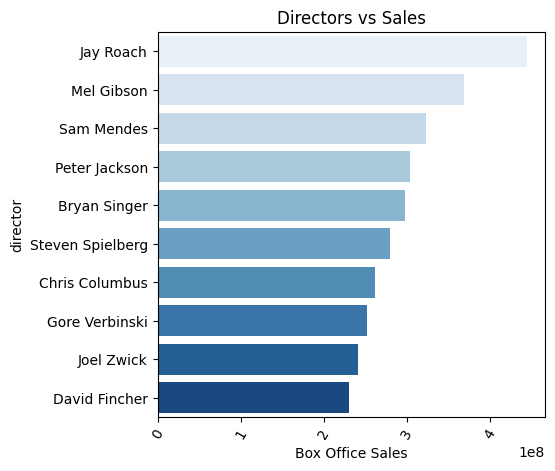

In [88]:
#best selling directors

# Group by director and sum the box office sales
director_sales = movie_df.groupby("director")["box_office"].sum().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(5, 5))
sns.barplot(x=director_sales.values, y=director_sales.index, palette="Blues", orient="h")  # Horizontal bars

# Add title and labels
plt.xlabel('Box Office Sales')
plt.title('Directors vs Sales')

# Include x-tick labels (rotate for readability)
plt.xticks(rotation=60)

# Show the plot
plt.show()

#### Findings:

It is evident that Jay Roach made the highest sales based on box-office. This may be brought about by factors such as quality direction, good work ethics and professionalism.

### Analysis based on popular movie rating 

We can further our analysis by movie rating popularity.

Note:  In this visualization we are reviwing most popular assigned for each audience as follows:
 1. R means restricted for audience under 18 years(adults)
 2. PG-13 means restricted for audience under 13 years
 3. PG means not restricted but requires parental guidance for audience less than 13 years
 4. NR means not rated
 5. G means for general audience meaning it is not restricted to any audience

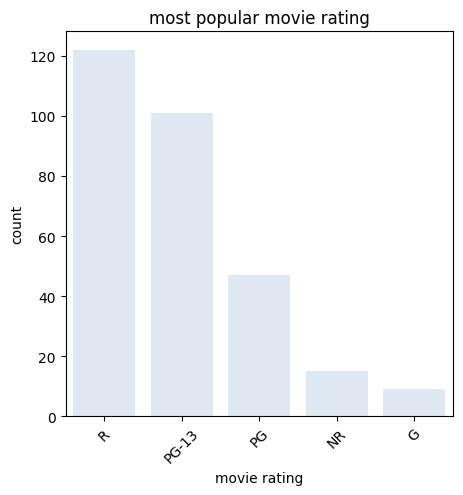

In [89]:
#popular movie rating
rating_popularity = movie_df['rating'].value_counts().head(5)
plt.figure(figsize=(5,5))
sns.barplot(x=rating_popularity.index,y=rating_popularity.values)
plt.title("most popular movie rating")
plt.xlabel("movie rating")
plt.ylabel("count")
plt.xticks(rotation=45);

#### Findings 

It is evident that the movie rating with the highest popularity is the R rated. This may be due to audience popularity who are adults.

### Analysis based on the best selling director yearly

Here we did analysis on the best selling director and he faired on yearly

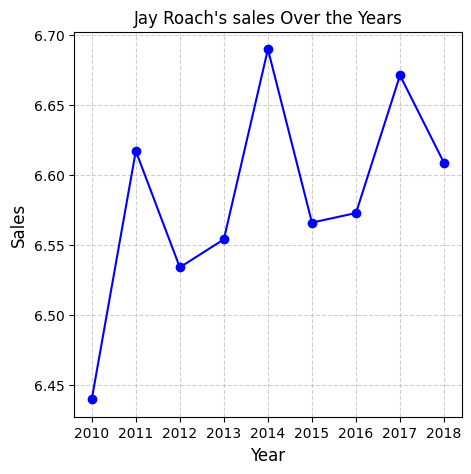

In [90]:
#univariate analysis based on the highest selling director
# Filter for the genre of interest
highest_director = "Jay Roach"
director_df = movie_df[movie_df['director'].str.contains(highest_director, na=False)]

# Perform univariate analysis: Focus on average ratings over time
performance_yearly = director_df.groupby('year')['box_office'].mean()

# Plotting the univariate trend
plt.figure(figsize=(5, 5))
drama_yearly.plot(kind='line', marker='o', color='blue')
plt.title("Jay Roach's sales Over the Years")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

#### Findings:

The director sales have exhibit fluctuations over the years, with no consistent upward or downward trend. There are peaks and troughs at various points.
The sales peaked significantly in 2014.
There was another noticeable high point in 2017.
The lowest sales occurred in 2010 and 2011.
A decline in sales can also be observed in 2015 and 2018 after prior increases.
Between 2012 and 2013 as well as 2015 to 2016, the sales remained relatively stable with minimal fluctuations.
The variation in sales could be attributed to the performance of individual projects, changes in market dynamics, or external factors like competition or shifts in audience preferences.

## Conclusions based on our analysis

1. The drama genre is highest in rating and popularity
2. The genre adventure,comedy,Sci-Fi is top selling genre
3. The top selling movies are all associated the top rated and most popular genre which is drama
4. There has been a decline in average_rating for the drama genre
5. Clint Eastwood is the most popular director
6. The best selling director is Jay Roach
7. Most popular movies based on their movie ratings are for the adult audience
8. The best selling director has been able to maintain high sales

## Recommendations 

1. We recommend the studio produce movies related to the drama genre
2. The studio to consider making movies associated with the Adventure,Comedy,Sci-Fi genres as the highest selling genres
3. Also recommend the studio to work with the director Clint Eastwood based on his popularity
4. The studio can also consider working with the highest selling director Jay Roach
5. Finally we recommend that the studio make adult films as it is the most popular among the audiences

# Modeling


# Evaluation